## Perform an EDA on the training data

- [FAIR's 2017 ACL paper](https://research.fb.com/publications/automatically-generating-rhythmic-verse-with-neural-networks/) achieved pretty good result using 34 million character set, with a 3-layer LSTM (2048-dimension hidden layer, and 128 dimension encoding). The model converged in 20 epochs.
- I think there might be something wrong with my training data.

In [27]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import re
import time
import operator
import pandas as pd
%matplotlib inline
import json
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import nltk

In [2]:
# Read in the training data
def vocab2vec(vocab_size, vocab_length=10**7):
    f = open("Combined_String.txt", "r")
    s = f.read()
    f.close()
    D = 'abcdefghijklmnopqrstuvwxyz .,\'()1234567890";'
    res = []
    for i in range(vocab_length):
        c = s[i].lower()
        v = np.zeros((vocab_size))
        try:
            idx = D.index(c)
            v[idx] = 1
            res.append(v)
        except (ValueError, IndexError) as e:
            pass
        
        
    ret = np.array(res) # A list of shape (vocab_length,) one-hot encoded characters
    print ("shape is: {}".format(ret.shape))
    return ret

vocab2vec(40)
# Around 10 million characters.

shape is: (9928579, 40)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
# Read the words
def read_words():
    f = open("Combined_String.txt", "r")
    s = f.read().lower()
    f.close()
    s.replace("\t", " ")
    s.replace("\n", " ")
    print ("character count={}".format(len(s)))
    words = s.split(" ")
    print ("len(words)={}".format(len(words)))
    f = open("combined_word_lists.txt", "w+")
    f.write(json.dumps(words))
    f.close()
    
read_words()

character count=235614224
len(words)=42632595


In [15]:
# Get the most frequent words
f = open("combined_word_lists.txt", "r")
words = json.loads(f.read())
f.close()

start_time = time.time()
wdict = {}
for w in words:
    if w not in wdict:
        wdict[w] = 1
    else:
        wdict[w] += 1

words_sorted = sorted(wdict.items(), key=operator.itemgetter(1))
used_time = time.time() - start_time
print ("Finished sorting words based on frequency in {} seconds".format(used_time))

f = open("word_lists_w_frequency", "w+")
f.write(json.dumps(words_sorted))
f.close()

Finished sorting words based on frequency in 14.199945211410522 seconds


Top 100 words: ['the', 'and', 'a', 'to', 'was', 'in', 'of', 'i', 'we', 'for', 'is', 'hotel', 'it', 'at', 'room', 'but', 'were', 'on', 'with', 'you', 'very', 'that', 'this', 'not', 'had', 'our', 'are', 'have', 'as', 'from', 'there', 'my', 'they', 'be', 'so', 'would', 'stay', '-', 'all', 'great', 'if', 'staff', 'good', 'one', 'which', 'no', 'an', 'rooms', 'stayed', 'when', 'just', 'only', 'or', 'location', 'get', 'about', 'out', 'us', 'nice', 'breakfast', 'by', 'up', 'also', 'could', 'other', 'some', 'like', 'service', 'night', 'really', 'can', 'did', 'time', 'your', 'than', 'more', 'will', 'clean', 'small', 'place', 'here', 'two', 'even', 'me', 'after', 'what', 'walk', 'been', 'go', 'got', 'bathroom', 'back', 'bed', 'little', '2', 'well', 'hotel.', "didn't", 'has', 'much']
Top 100 non-stopwords: ['hotel', 'room', 'would', 'stay', '-', 'great', 'staff', 'good', 'one', 'rooms', 'stayed', 'location', 'get', 'us', 'nice', 'breakfast', 'also', 'could', 'like', 'service', 'night', 'really', '

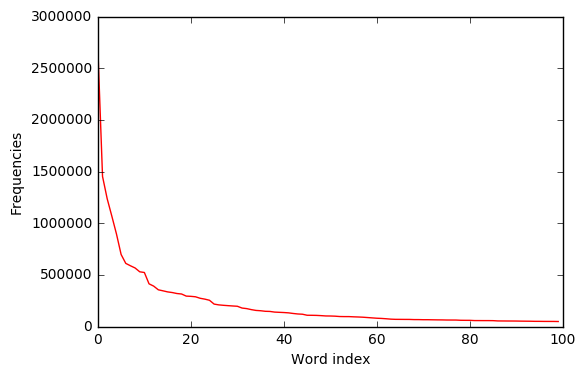

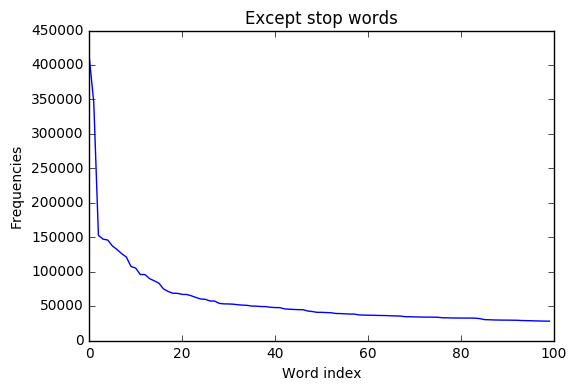

In [31]:
# Plot a histogram of the top 500 words 
f = open("word_lists_w_frequency", "r")
words = json.loads(f.read())
f.close()
N = 100
top_N_words = []
word_freq = []
for i in range(len(words)-1, -1, -1):
    if (i == len(words)-1-N): 
        break
    top_N_words.append(words[i][0])
    word_freq.append(words[i][1])
print ("Top {} words: {}".format(N, top_N_words))

plt.figure()
plt.plot([i for i in range(N)], word_freq, "r-")
plt.xlabel("Word index")
plt.ylabel("Frequencies")


stpwords = nltk.corpus.stopwords.words('english')
top_N_words_nstop = []
word_freq = []
for i in range(len(words)-1, -1, -1):
    if (len(word_freq) == N):
        break
    if (words[i][0] not in stpwords):
        top_N_words_nstop.append(words[i][0])
        word_freq.append(words[i][1])
        
print ("Top {} non-stopwords: {}".format(N, top_N_words_nstop))
plt.figure()
plt.plot([i for i in range(N)], word_freq, "b-")
plt.xlabel("Word index")
plt.ylabel("Frequencies")
plt.title("Except stop words")

In [ ]:
# Perform LDA on the whole dataset... Do that in the TFIDF.ipynb

In [12]:
wdict = {'a': 0, 'b': 1}
sorted(wdict.items(), key=operator.itemgetter(1))

[('a', 0), ('b', 1)]

In [22]:
[i for i in range(10, -1, -1)]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [29]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '